# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

#import plotly.plotly as py
#import plotly.graph_objs as go
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

/home/luca/anaconda3/envs/tensorflow/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:558: DeprecationWarning:

plotly.graph_objs.YAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.YAxis
  - plotly.graph_objs.layout.scene.YAxis


/home/luca/anaconda3/envs/tensorflow/lib/python3.6/site-packages/plotly/graph_objs/_deprecations.py:531: DeprecationWarning:

plotly.graph_objs.XAxis is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.XAxis
  - plotly.graph_objs.layout.scene.XAxis




## General packages 

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import json

# Visualizations
import seaborn as sns
from matplotlib import pyplot as plt

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
pd.options.display.float_format = '{:,.4f}'.format

## Custom imports 

# Data Exploration 

In [3]:
%%time

# read data downloaded through fetch_all_data.py
with open("issues.json", 'r') as f:
    raw_data = json.load(f)

# reorganize them in a pandas dataframe structure    
errors = pd.DataFrame()
for page in raw_data:
    for record in page:
        idx = record.pop('id')
        temp = pd.DataFrame(record, index=[idx])
        errors = errors.append(temp)
        #break
#     break

CPU times: user 5.78 s, sys: 8.06 ms, total: 5.79 s
Wall time: 5.82 s


In [4]:
errors.head()

,message,src_site,dst_site,category,amount,type,status,last_modified
1,SOURCE [70] globus_xio: Unable to connect to a...,BU_ATLAS_Tier2,BNL-ATLAS,9,178,transfer-failure,New,2019-08-06T14:07:04.412401+02:00
2,TRANSFER [70] TRANSFER globus_xio: Unable to ...,BNL-ATLAS,BU_ATLAS_Tier2,10,3288,transfer-failure,New,2019-08-06T14:07:04.595574+02:00
3,TRANSFER [70] TRANSFER globus_xio: Unable to ...,INFN-NAPOLI-ATLAS,BU_ATLAS_Tier2,10,3288,transfer-failure,New,2019-08-06T14:07:04.692554+02:00
4,SOURCE [70] globus_xio: Unable to connect to a...,BU_ATLAS_Tier2,CERN-PROD,11,227,transfer-failure,New,2019-08-06T14:07:04.803866+02:00
5,SOURCE [70] globus_xio: Unable to connect to a...,BU_ATLAS_Tier2,TOKYO-LCG2,11,130,transfer-failure,New,2019-08-06T14:07:04.891438+02:00


In [5]:
errors.dtypes

message          object
src_site         object
dst_site         object
category          int64
amount            int64
type             object
status           object
last_modified    object
dtype: object

In [8]:
errors.describe(include=['object', 'category', 'int64'])
# errors.describe(include=['category'])

,message,src_site,dst_site,category,amount,type,status,last_modified
count,2556,2556,2556,"2,556.0000","2,556.0000",2556,2556,2556
unique,544,89,90,nan,nan,2,1,2456
top,Transfer has been forced-killed because it was...,INFN-T1,CSCS-LCG2,nan,nan,transfer-failure,New,2019-08-07T12:00:06.082553+02:00
freq,67,186,305,nan,nan,2421,2556,2
mean,NaN,NaN,NaN,148.1839,"2,149.5356",NaN,NaN,NaN
std,NaN,NaN,NaN,90.2092,"5,868.3735",NaN,NaN,NaN
min,NaN,NaN,NaN,4.0000,1.0000,NaN,NaN,NaN
25%,NaN,NaN,NaN,71.0000,108.7500,NaN,NaN,NaN
50%,NaN,NaN,NaN,128.0000,538.0000,NaN,NaN,NaN
75%,NaN,NaN,NaN,235.0000,"1,488.0000",NaN,NaN,NaN


In [9]:
errors[errors.isnull().any(axis=1)]

,message,src_site,dst_site,category,amount,type,status,last_modified


<div class="alert alert-block alert-info">
<b>Tip:</b> In case we need to fill NAs:
    
`errors = errors.fillna({"VAR_NAME": <FILL_VALUE>})`

In order to choose how to impute missing values, a simple strategy may be to look at the most common value:

`errrors.<VAR_NAME>.value_counts()`
</div>

In [10]:
print("Source site distribution:\n", errors["src_site"].value_counts())
print("\nDestination site distribution:\n", errors["dst_site"].value_counts())

Source site distribution:
 INFN-T1                 186
BNL-ATLAS               177
UNKNOWN                 140
CERN-PROD               123
CSCS-LCG2               119
FZK-LCG2                 87
IN2P3-CC                 68
RAL-LCG2                 65
NIKHEF-ELPROD            63
DESY-HH                  61
UKI-SCOTGRID-GLASGOW     58
TRIUMF-LCG2              56
pic                      53
Taiwan-LCG2              52
NDGF-T1                  51
                       ... 
Nevis                     3
UKI-SCOTGRID-ECDF         3
ZA-CHPC                   3
ZA-WITS-CORE              3
PSNC                      3
NERSC-PDSF                3
HK-LCG2                   2
mainz                     1
IL-TAU-HEP                1
FR-ALPES                  1
INFN-ROMA2                1
UKI-SOUTHGRID-SUSX        1
INFN-LECCE                1
RU-Protvino-IHEP          1
INFN-GENOVA               1
Name: src_site, Length: 89, dtype: int64

Destination site distribution:
 CSCS-LCG2                 305
U

In [22]:
top_n = 12
np.sum(errors.src_site.value_counts()[:cutoff] / np.sum(errors.src_site.value_counts()) )
np.sum(errors.dst_site.value_counts()[:cutoff] / np.sum(errors.dst_site.value_counts()) )

0.6232394366197183

0.7077464788732396

In [23]:
top_lbl_src = errors.src_site.value_counts().index.tolist()[:top_n]
top_lbl_dst = errors.dst_site.value_counts().index.tolist()[:top_n]

In [27]:
errors_top_sites = errors.query("src_site in @top_lbl_src and dst_site in @top_lbl_dst")

In [28]:
temp = errors_top_sites[["src_site", "dst_site"]]

In [45]:
val = "transfer-failure"
errors_top_sites.query("type==@val ").head()

,message,src_site,dst_site,category,amount,type,status,last_modified
2,TRANSFER [70] TRANSFER globus_xio: Unable to ...,BNL-ATLAS,BU_ATLAS_Tier2,10,3288,transfer-failure,New,2019-08-06T14:07:04.595574+02:00
13,SOURCE [70] srm-ifce err: Communication error ...,INFN-T1,RAL-LCG2,19,693,transfer-failure,New,2019-08-23T10:00:07.897494+02:00
17,Failed to stage-out logs to OS: no OS_LOGS ddm...,IN2P3-CC,UNKNOWN,23,1,transfer-failure,New,2019-08-07T19:00:04.747496+02:00
21,Could not figure out destination path from dst...,IN2P3-CC,UNKNOWN,24,2,transfer-failure,New,2019-09-18T23:00:09.645147+02:00
32,Copy operation failed [is_stagein=False]: None...,IN2P3-CC,UNKNOWN,21,8,transfer-failure,New,2019-09-05T21:00:06.267795+02:00


CPU times: user 437 ms, sys: 168 ms, total: 605 ms
Wall time: 223 ms


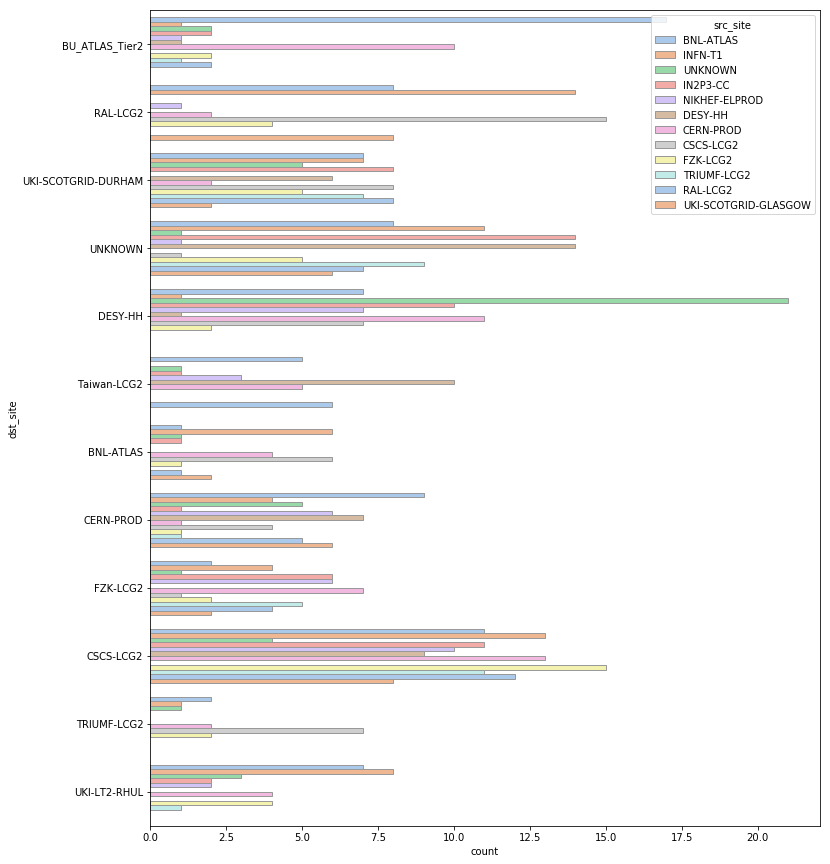

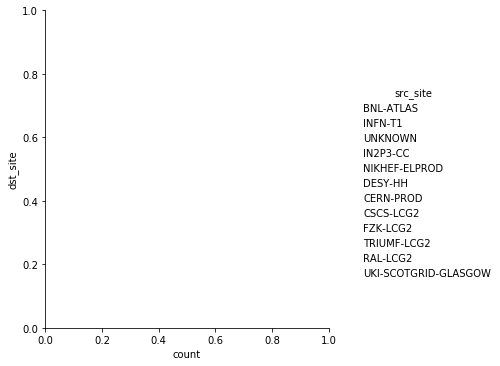

In [71]:
%%time

val = "deletion-failure"

f, ax = plt.subplots(figsize=(12, 15))
sns.catplot(ax=ax, y="dst_site", hue="src_site", kind="count",
            palette="pastel", edgecolor=".6", #order = top_lbl_dst[::-1],
            data=errors_top_sites)#errors_top_sites.query("type==@val "))

In [76]:
# grouped = train.groupby(['cut','clarity'])
# grouped.size()

grouped = errors_top_sites.groupby(["src_site", "dst_site"])
grouped.size()

src_site              dst_site           
BNL-ATLAS             BNL-ATLAS               1
                      BU_ATLAS_Tier2         17
                      CERN-PROD               9
                      CSCS-LCG2              11
                      DESY-HH                 7
                      FZK-LCG2                2
                      RAL-LCG2                8
                      TRIUMF-LCG2             2
                      Taiwan-LCG2             5
                      UKI-LT2-RHUL            7
                      UKI-SCOTGRID-DURHAM     7
                      UNKNOWN                 8
CERN-PROD             BNL-ATLAS               4
                      BU_ATLAS_Tier2         10
                      CERN-PROD               1
                                             ..
UKI-SCOTGRID-GLASGOW  FZK-LCG2                2
                      RAL-LCG2                8
                      UKI-SCOTGRID-DURHAM     2
                      UNKNOWN                 

In [74]:
grouped

In [52]:
bivar_sites = pd.crosstab(index=errors_top_sites["src_site"], 
                          columns=errors_top_sites["dst_site"])

In [54]:
bivar_sites

dst_site,BNL-ATLAS,BU_ATLAS_Tier2,CERN-PROD,CSCS-LCG2,DESY-HH,FZK-LCG2,RAL-LCG2,TRIUMF-LCG2,Taiwan-LCG2,UKI-LT2-RHUL,UKI-SCOTGRID-DURHAM,UNKNOWN
src_site,,,,,,,,,,,,
BNL-ATLAS,1,17,9,11,7,2,8,2,5,7,7,8
CERN-PROD,4,10,1,13,11,7,2,2,5,4,2,0
CSCS-LCG2,6,0,4,0,7,1,15,7,0,0,8,1
DESY-HH,0,1,7,9,1,0,0,0,10,0,6,14
FZK-LCG2,1,2,1,15,2,2,4,2,0,4,5,5
IN2P3-CC,1,2,1,11,10,6,0,0,1,2,8,14
INFN-T1,6,1,4,13,1,4,14,1,0,8,7,11
NIKHEF-ELPROD,0,1,6,10,7,6,1,0,3,2,0,1
RAL-LCG2,1,2,5,12,0,4,0,0,6,0,8,7


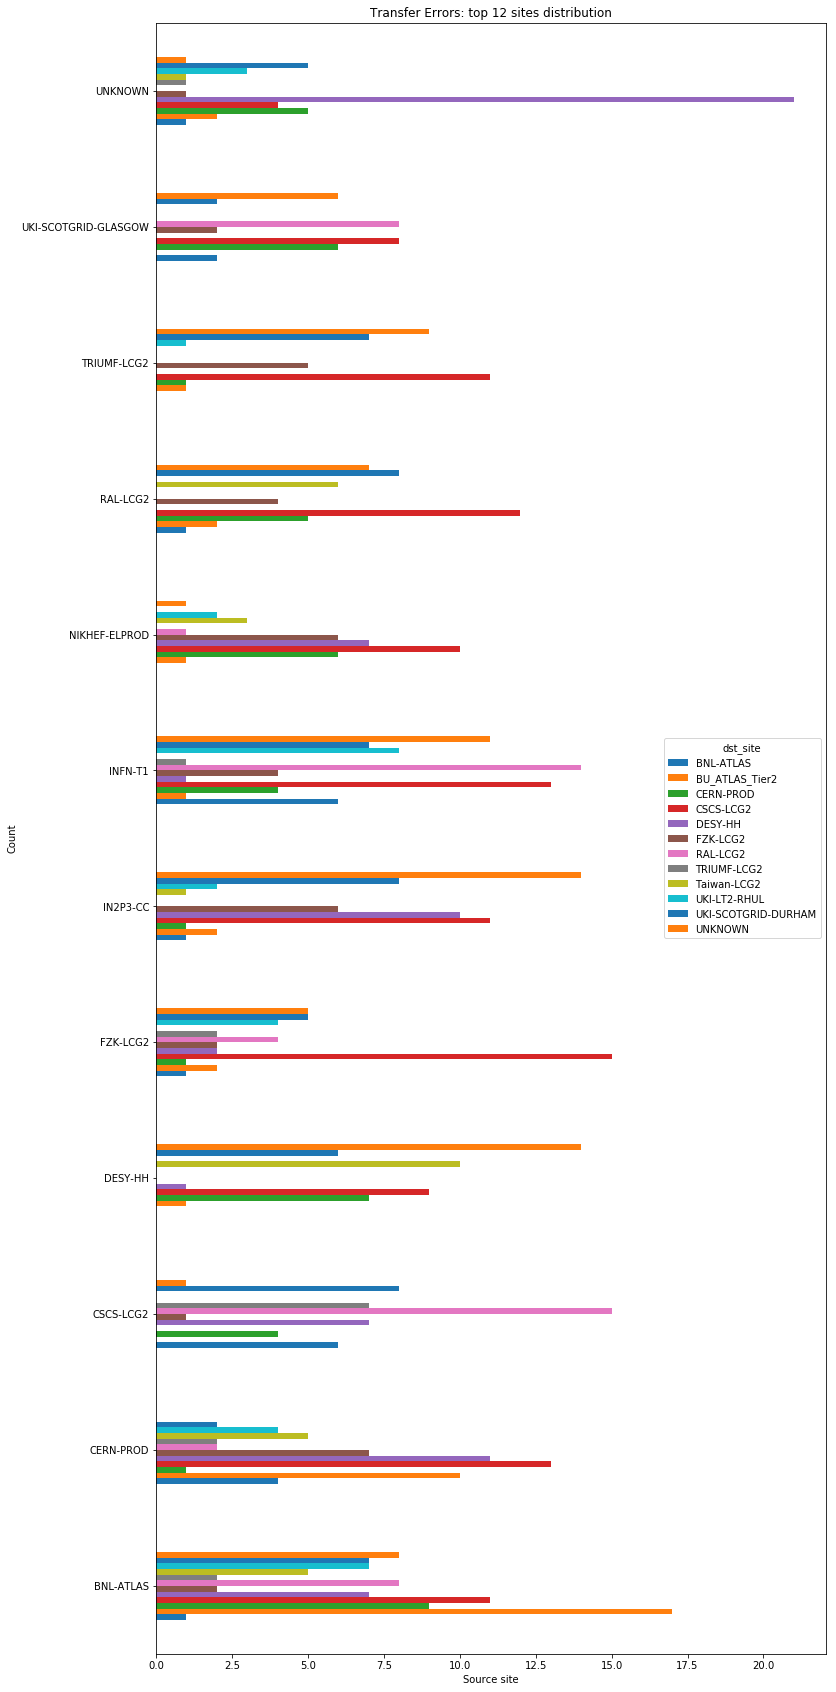

In [81]:
brplt = bivar_sites.plot(kind="barh", 
                 figsize=(12,30),
                 stacked=False, title="Transfer Errors: top 12 sites distribution", sort_columns=True)
_ = plt.xlabel("Source site")
_ = plt.ylabel("Count")

# Appendix 

In [ ]:
f, ax = plt.subplots(figsize=(6, 10))
sns.countplot(y="dst_site", data=errors)

In [ ]:
errors['dst_site'].value_counts().plot(kind='barh', figsize=(6,10), color=["red"])

In [ ]:
plt.figure(figsize=(1, 1))
sns.catplot(x = "src_site", kind="count", data=errors)

In [ ]:
sns.catplot(y="dst_site", hue="src_site", kind="count",
            palette="pastel", edgecolor=".6", order=top_8_lbl_dst,
            data=temp);

# Analysis/Modeling
Do work here

In [7]:
import gensim

In [ ]:
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here